In [1]:
import yt
import numpy as np
import ipyvolume
import h5py # used for using brain-scan data (last week)

Just copying how we read in the brain scan data last time:

In [2]:
with h5py.File('single_dicom.h5', 'r') as f:
    scan_data = f['/scan'][:]

In [3]:
scan_data.shape

(36, 512, 512)

In [4]:
# translate into yt-object to use volume rendering
dsd = yt.load_uniform_grid({'scan': scan_data}, 
                          [36, 512, 512], 
                          length_unit = yt.units.cm, 
                          bbox = np.array([[0,10], [0,10], [0,10]]) )

yt : [INFO     ] 2020-04-27 10:11:11,393 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-04-27 10:11:11,393 Parameters: domain_dimensions         = [ 36 512 512]
yt : [INFO     ] 2020-04-27 10:11:11,394 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-04-27 10:11:11,395 Parameters: domain_right_edge         = [10. 10. 10.]
yt : [INFO     ] 2020-04-27 10:11:11,395 Parameters: cosmological_simulation   = 0.0


In [5]:
dsd.field_list

[('stream', 'scan')]

yt : [INFO     ] 2020-04-27 10:11:12,842 Rendering scene (Can take a while).
yt : [INFO     ] 2020-04-27 10:11:12,849 Creating volume
/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1396: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1396: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2020-04-27 10:11:13,434 Creating transfer function
yt : [INFO     ] 2020-04-27 10:11:13,435 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


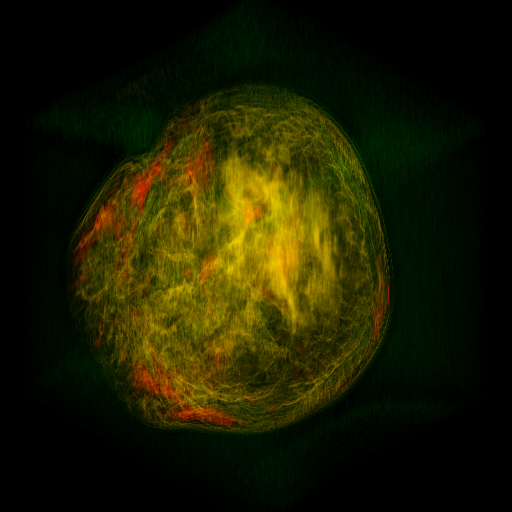

In [6]:
scd = yt.create_scene(dsd, 'scan')
scd.show()

In [7]:
sc.camera

NameError: name 'sc' is not defined

In [ ]:
scd = yt.create_scene(dsd, 'scan')
scd.camera.position = [10, 0, 0]
scd.camera.north_vector = [0,-1,0]
scd.camera.switch_orientation()
scd.show()

In [ ]:
ipyvolume.figure()
ipyvolume.volshow(scan_data) # directly from the scan data
ipyvolume.show()